### Hyperparameter tuning + Cross Validation

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.model_selection import GridSearchCV, KFold

In [3]:
digits = datasets.load_digits()

In [4]:
X,Y = digits.data, digits.target

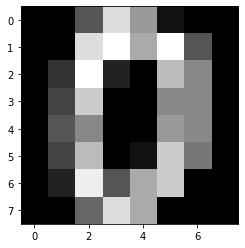

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(8,8),cmap="gray")

In [7]:
param_grid = {
    "C":[.0001,.001,1,10],
    "kernel":['linear','rbf'],
    "gamma":[.001,.01,1,10]
}

In [8]:
from sklearn.svm import SVC

In [9]:
kf = KFold(5,shuffle=True)
gs = GridSearchCV(SVC(random_state=1),param_grid=param_grid,cv=kf,scoring="accuracy")

In [10]:
gs.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 1, 10],
                         'gamma': [0.001, 0.01, 1, 10],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [11]:
gs.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [12]:
gs.best_score_

0.9905369854534201

In [14]:
model=gs.best_estimator_
model

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

LETs Check Loginstic Model...

In [15]:
p = {
    "C":[0.001,0.01,0.1,1,10]
}
grid = GridSearchCV(LogisticRegression(),param_grid=p,cv=kf, scoring="accuracy")

In [16]:
grid.fit(X,Y)

C:\Users\SachTech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SachTech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\SachTech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SachTech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [18]:
grid.best_params_

{'C': 0.01}

In [19]:
grid.best_score_

0.9738409161250386

Hence, SVM model is best for this dataset

### Build Model

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=.20,random_state=10)

In [22]:
model.fit(xtrain,ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
model.score(xtrain,ytrain)

0.9986082115518441

In [24]:
model.score(xtest,ytest)

0.9916666666666667

we should use GridSearchCV  rather than Cross Validation. Because it does both Cross Validation + hyperparameter tuning

In [25]:
gs.cv_results_

{'mean_fit_time': array([0.15922623, 0.77418027, 0.1433373 , 0.85225964, 0.18419409,
        1.15596972, 0.16563678, 1.09607501, 0.11213212, 0.81458344,
        0.0899766 , 0.78188024, 0.08067431, 1.80910439, 0.09813962,
        1.13299928, 0.0758173 , 0.29450436, 0.1353178 , 0.81691775,
        0.1143322 , 1.60024037, 0.11512861, 1.2910676 , 0.14525738,
        0.23445482, 0.08594828, 0.87756314, 0.07908731, 1.21296725,
        0.08874459, 1.37309613]),
 'std_fit_time': array([0.02069591, 0.08278247, 0.00262659, 0.10616401, 0.02664156,
        0.22786678, 0.0051798 , 0.1436995 , 0.0573095 , 0.0733185 ,
        0.00530187, 0.04377805, 0.00413186, 0.42944208, 0.01291319,
        0.17301308, 0.00722581, 0.1538662 , 0.02015321, 0.04419596,
        0.02832342, 0.34244351, 0.02868184, 0.20511101, 0.03946942,
        0.00752122, 0.01146287, 0.14973599, 0.00406194, 0.19927945,
        0.01469314, 0.1703684 ]),
 'mean_score_time': array([0.04417486, 0.09335618, 0.04359646, 0.16250329, 0.054966

In [26]:
df = pd.DataFrame(gs.cv_results_)
df.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.159226      0.020696         0.044175        0.005072  0.0001   
1       0.774180      0.082782         0.093356        0.010516  0.0001   

  param_gamma param_kernel                                             params  \
0       0.001       linear  {'C': 0.0001, 'gamma': 0.001, 'kernel': 'linear'}   
1       0.001          rbf     {'C': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.955556           0.961111           0.969359           0.955432   
1           0.083333           0.077778           0.075209           0.089136   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.966574         0.961606        0.005653               15  
1           0.064067         0.077905        0.008419               21

In [27]:
df[["param_C","param_kernel","param_gamma","mean_test_score"]]

param_C param_kernel param_gamma  mean_test_score
0   0.0001       linear       0.001         0.961606
1   0.0001          rbf       0.001         0.077905
2   0.0001       linear        0.01         0.961606
3   0.0001          rbf        0.01         0.077905
4   0.0001       linear           1         0.961606
5   0.0001          rbf           1         0.077905
6   0.0001       linear          10         0.961606
7   0.0001          rbf          10         0.077905
8    0.001       linear       0.001         0.980522
9    0.001          rbf       0.001         0.077905
10   0.001       linear        0.01         0.980522
11   0.001          rbf        0.01         0.077905
12   0.001       linear           1         0.980522
13   0.001          rbf           1         0.077905
14   0.001       linear          10         0.980522
15   0.001          rbf          10         0.077905
16       1       linear       0.001         0.981633
17       1          rbf       0.001         0.990537
18       1       linear        0.01         0.981633
19       1          rbf        0.01         0.777962
20       1       linear           1         0.981633
21       1          rbf           1         0.077905
22       1       linear          10         0.981633
23       1          rbf          10         0.077905
24      10       linear       0.001         0.981633
25      10          rbf       0.001         0.990535
26      10       linear        0.01         0.981633
27      10          rbf        0.01         0.792433
28      10       linear           1         0.981633
29      10          rbf           1         0.077905
30      10       linear          10         0.981633
31      10          rbf          10         0.077905